#EDA (Explaratory Data Analysis)

1. 문제를 인식
  - ex) 보험료가 바르게 책정되고 있는지를 확인

2. 변수 설명
3. 데이터에 대한 이해


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [2]:
sns.set_style("whitegrid") #스타일 기호

In [3]:
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- bmi : body mass index

- charge : individual medical cost 개인의 의료 비용 (의료 보험회사에서 청구하는)

In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.describe() #수치형 데이터만 나타남. 범주형데이터(object, string으로 되어있는 것)/ skewed되어있다 mean-50% 비교했을때

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df.describe(include="O") #capital o as in object

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


- 범주형 데이터(strings),
  - top : 가장 많이 나오는 유형
  - freq(uency) : 가장 많이 나오는 유형에 대한 빈도

- Results
  - 성별 중에서 가장 많이 도출되는 형태는 male
    - male은 676번 도출
  - 지역의 경우, southeast가 가장 많이 있음
    - southeast는 364번 관찰됨

  - 대부분의 사람들은 non-smoker임
    - 이들은 1064명임

In [15]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [17]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# 4. Data Cleaning

(1) missing value
(2) 중복데이터 확인

In [20]:
df.isnull().sum() #하나하나 확인불가능함 .sum()을 붙여 한번에 확인

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.info() #결측치는 없다 하더라도 ?나 .이 있어 없다고 뜰 수 있으므로 Dtype으로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.duplicated().sum()

1

In [26]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [27]:
df.drop_duplicates(keep="first", inplace = True) #first는 남겨두고 inplace = True 영원히 drop한다.

- drop_duplicates 메소드 사용하여 중복된 행 제거

  - keep = "first"
    - 첫 번째것은 남겨둠(중복되어서 데이터가 두개니까)

  - inplace = True
    - 영구히 데이터 변경

In [28]:
df.duplicated().sum()

0

#5. 데이터 시각화

  ### 5.1 개별 변수 분석


        - 각 변수별 분포 분석
        - 기초통계량 summary set
        - 분포도
        - 차트 (boxplot, histogram, barplot, piechart)


In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- 변수 charges

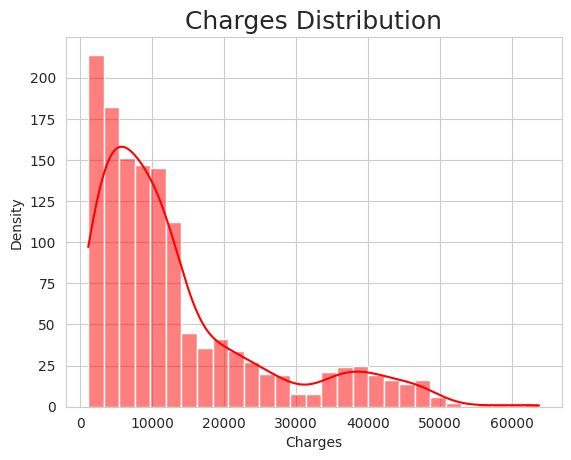

In [35]:
sns.histplot(df["charges"], color = "r", kde = True) #kde : kernel density estimation
plt.title("Charges Distribution", size = 18)
plt.xlabel("Charges")
plt.ylabel("Density")
plt.show() #white grid가 나타난 모습
#오른쪽으로 tail이 뻗혀져 있는 것이 핵심이다. 오른쪽으로 굉장히 long tail = right skewed

- "charges":
  - right skewed (positive skewed)

- 왜도(skewness)
  - 3차 모먼트

  $$ \gamma_1=E(\frac{x-\mu}{\sigma})^3]$$

이거시험
right skewed(median<mean) - mean=median - left skewed(median>mean)

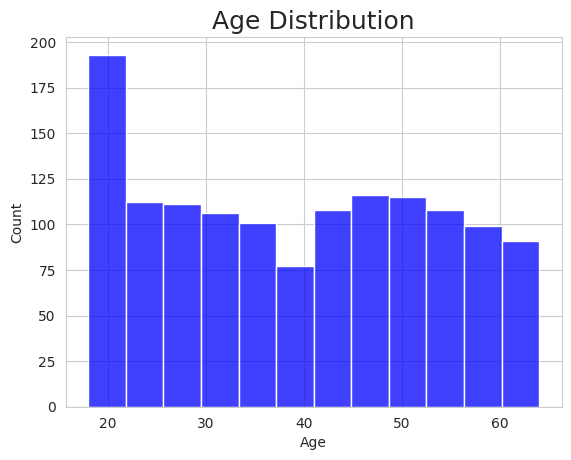

In [37]:
sns.histplot(df["age"], color = "b" )
plt.title("Age Distribution", size = 18)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
#20대만 높고 다른건 평평 =  uniform distribution->그래서 kde = True가 필요없음.

- 의료보험 고객 중 가장 빈번한 나이대는 18-19세임

- 분포는 uniform distribution 형태처럼 나타남

** BMI **



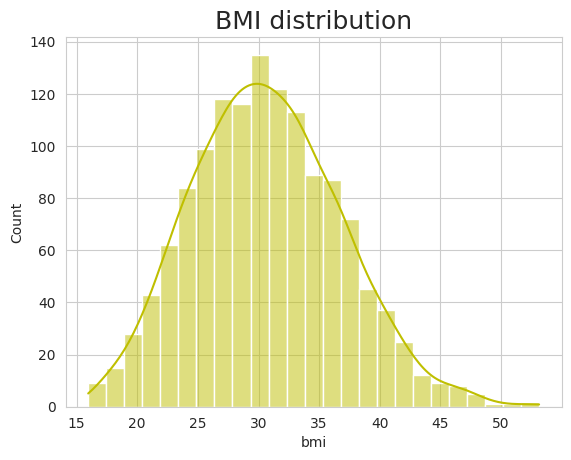

In [39]:
sns.histplot(df["bmi"], color = "y", kde = True)
plt.title("BMI distribution", size = 18)
plt.show()

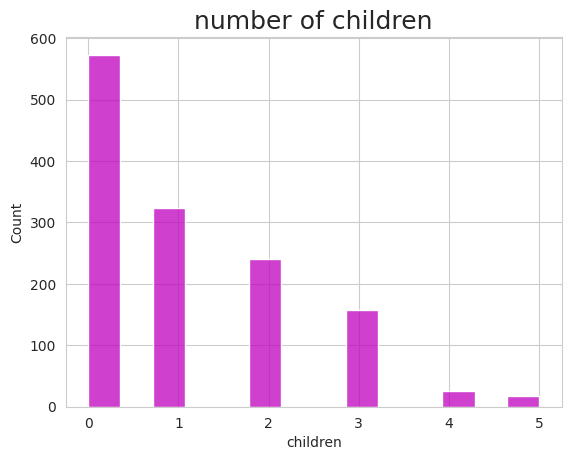

In [41]:
sns.histplot(df["children"], color = "m")
plt.title("number of children", size = 18)
plt.show()

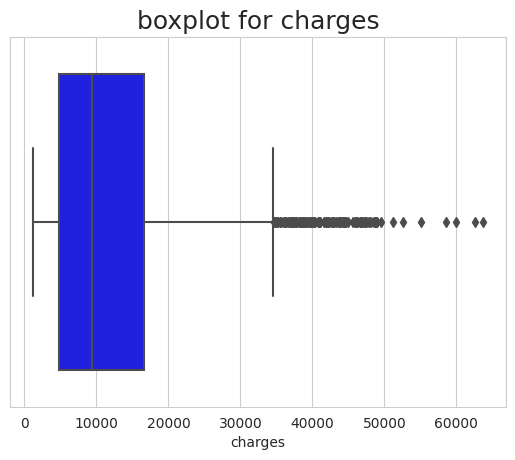

In [45]:
sns.boxplot(data = df, x = "charges", color = "b")
plt.title("boxplot for charges", size = 18)
plt.show()

In [47]:
q1_charges = df["charges"].quantile(0.25)
q3_charges = df["charges"].quantile(0.75)
iqr_charges = q3_charges - q1_charges
print(iqr_charges)

11911.37345


In [48]:
ll = q1_charges - 1.5*iqr_charges
ul = q3_charges + 1.5*iqr_charges

In [50]:
df[(df["charges"]<ll) | (df["charges"]>ul)] #(df["charges"]<ll) | (df["charges"]>ul)이거만 하면
# boolean이라 true false 만 나옴. 그래서 df[]를 붙여서 []안에 있는 데이터를 찾아라

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


### Categorical Features (범주형 데이터)

**gender**

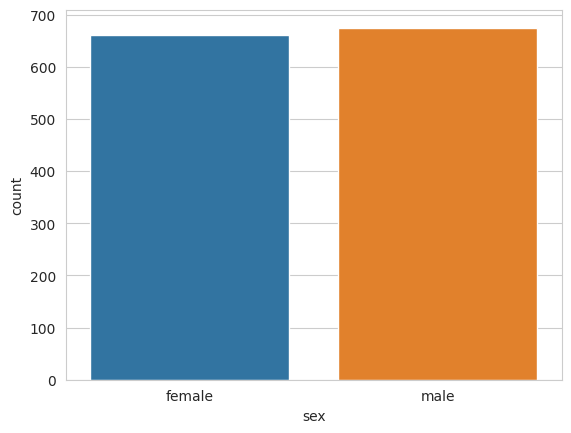

In [51]:
sns.countplot(x = "sex", data = df)
plt.show() #male female 비슷한 수치이다.

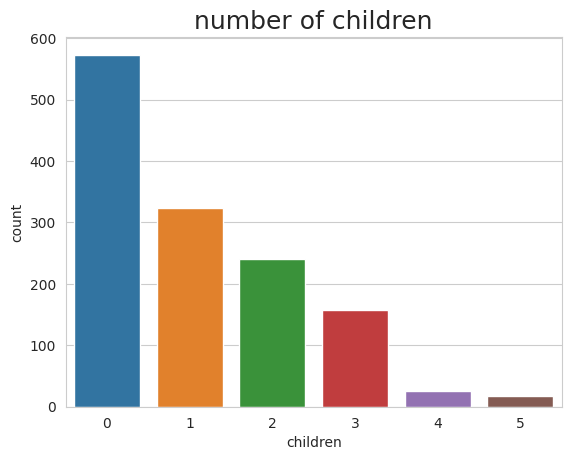

In [54]:
sns.countplot(x = "children", data = df)
plt.title("number of children", size = 18)
plt.xlabel("children")
plt.ylabel("count")
plt.show() #histogram보다 훨씬 보기 용이하다.
#majority of people have zero children and people rarely have four to five children

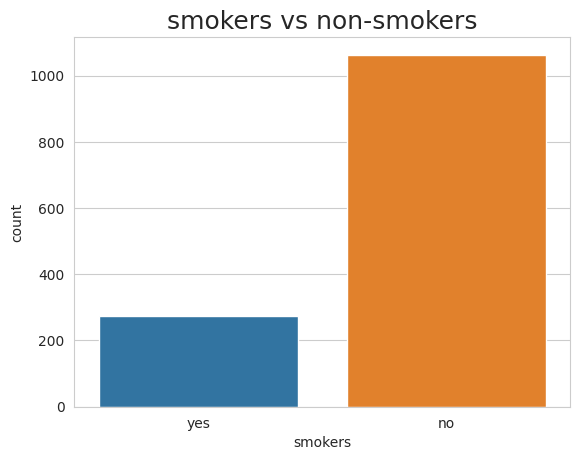

In [55]:
sns.countplot(x = "smoker", data = df)
plt.title("smokers vs non-smokers", size = 18)
plt.xlabel("smokers")
plt.ylabel("count")
plt.show()
#non-smokers가 훨씬 많았다.

In [56]:
df["smoker"].value_counts() #몇명인지 정확히 알고 싶으면->*4배 정도 많다

no     1063
yes     274
Name: smoker, dtype: int64

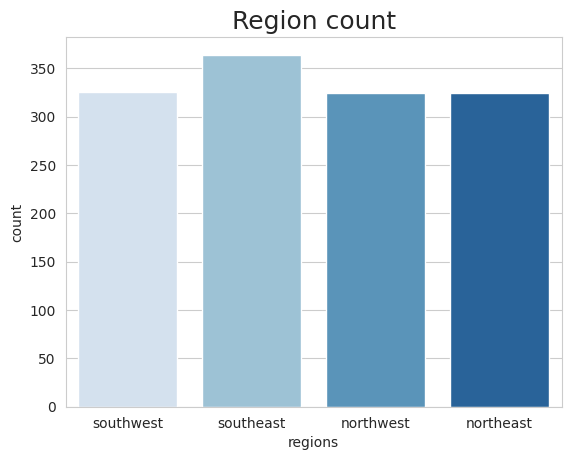

In [60]:
sns.countplot(x = "region", data = df, palette = "Blues") #palette라는 키워드.
plt.title("Region count", size = 18)
plt.xlabel("regions")
plt.ylabel("count")
plt.show()

In [58]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

##지금까지는 Univariate Analysis

### Bivariate Analysis

- 두 변수를 함께 분석하는 것을 의미함
- 두 변수간의 관계를 파악하는 것이 목적임

  - 박스플롯 etc

##Age vs Charges

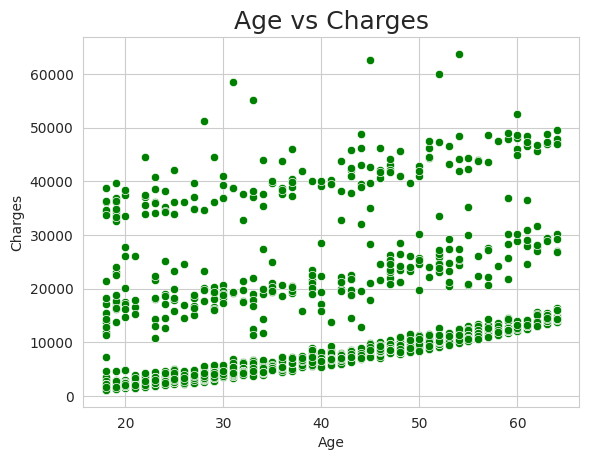

In [62]:
sns.scatterplot(x = "age", y = "charges", color = "g", data = df)
plt.title("Age vs Charges", size = 18)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()
#0과 만불 사이에는 선형적인 관계. 나이가 들 수록 많이 보인다. 6만불 = 자녀가 많거나 질병이있거나 좋은 보험 프로그램
#두 개의 numeric 수치형 데이터를 비교. 여기는 weak relationship이 보인다.

In [65]:
#pearson correlation
df.corr(numeric_only = True)["age"]["charges"] #그렇게 강한 correlation이 있지가 않다. = 0.3 정도
#numeric_only = True 값만 나오게

0.2983082125097863

#시험으로 두개의 수치형 데이터주면 위에처럼 하고 pearson correlation도 해야함

#smoker vs charges

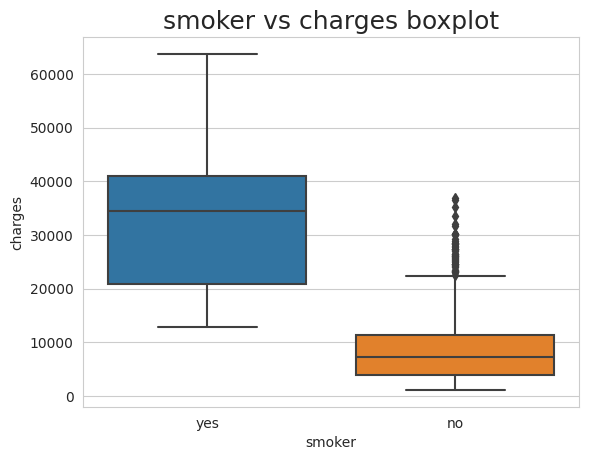

In [69]:
#범주형 자료와 수치형 자료 비교
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.title("smoker vs charges boxplot", size = 18)
plt.show()
#기본적으로 스모커한테 더 많은 비용을 책정

#### Pairplot (수치형 데이터)

- 두 개의 수치형 데이터의 관계를 보여주는 시각화 그래프


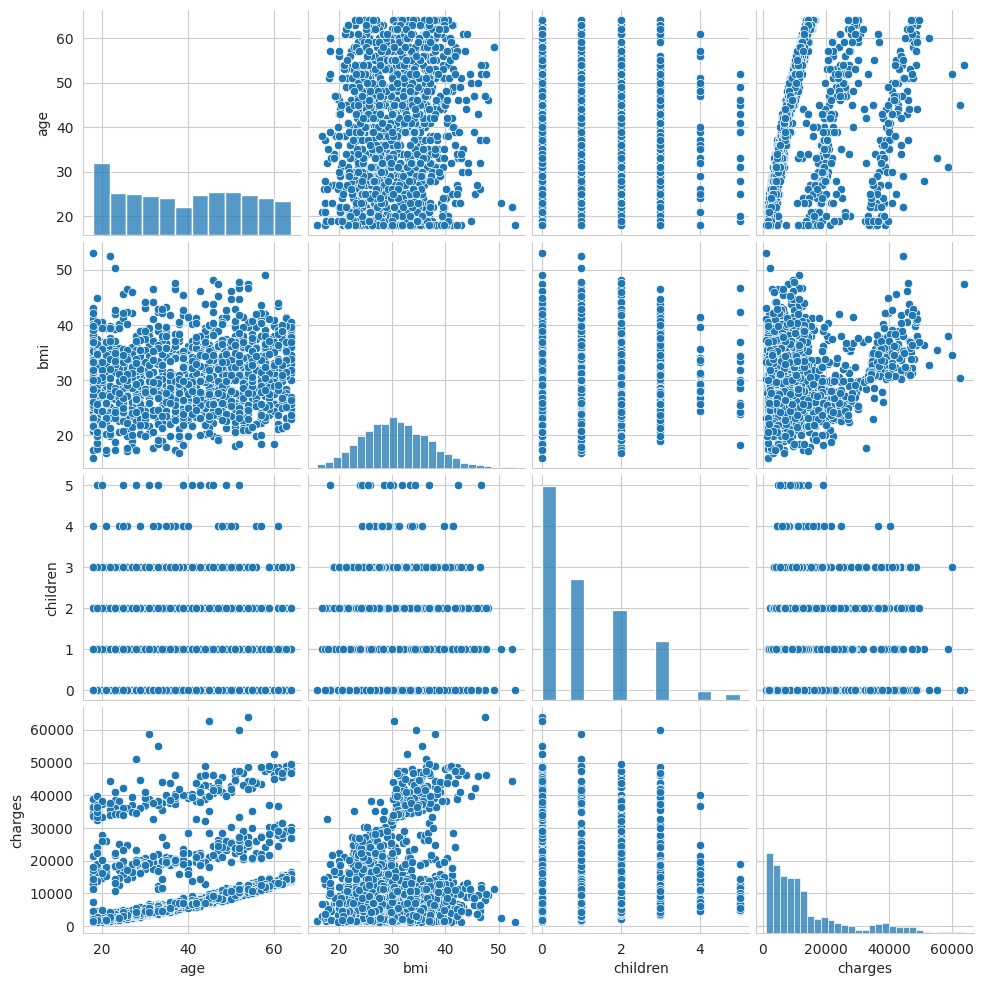

In [70]:
sns.pairplot(df) #우리가 힘들게 임의적으로 두개 짝지어서 그래프 그리지말고 이걸로 간단하게

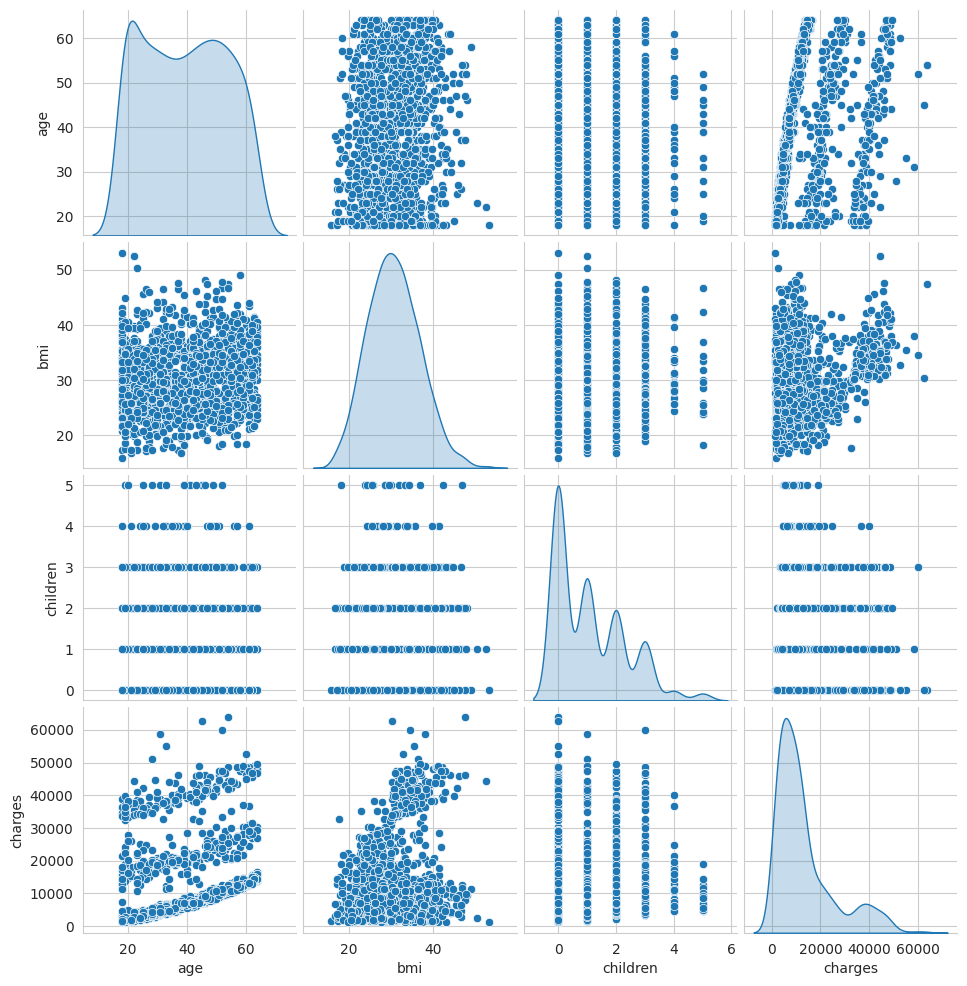

In [72]:
sns.pairplot(df, diag_kind="kde") #density로 보여주고 싶다면

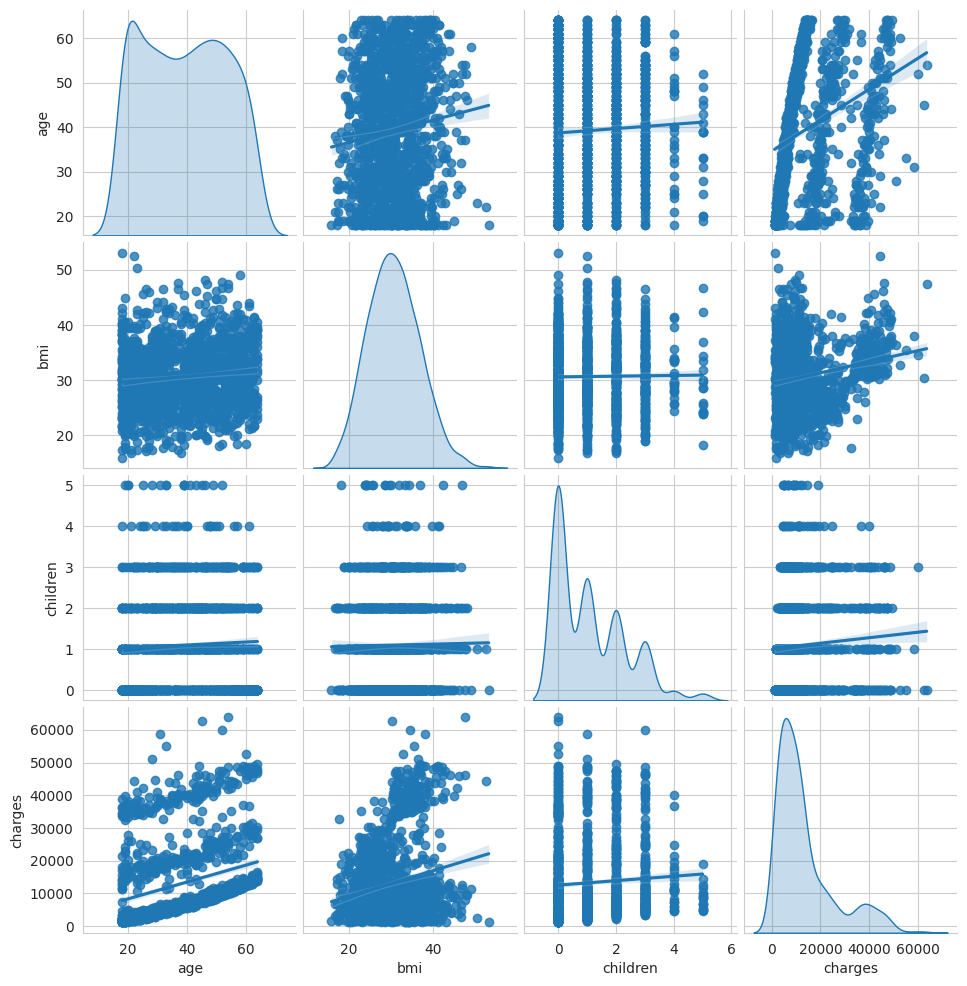

In [73]:
#선형으로
sns.pairplot(df, diag_kind = "kde", kind = "reg")

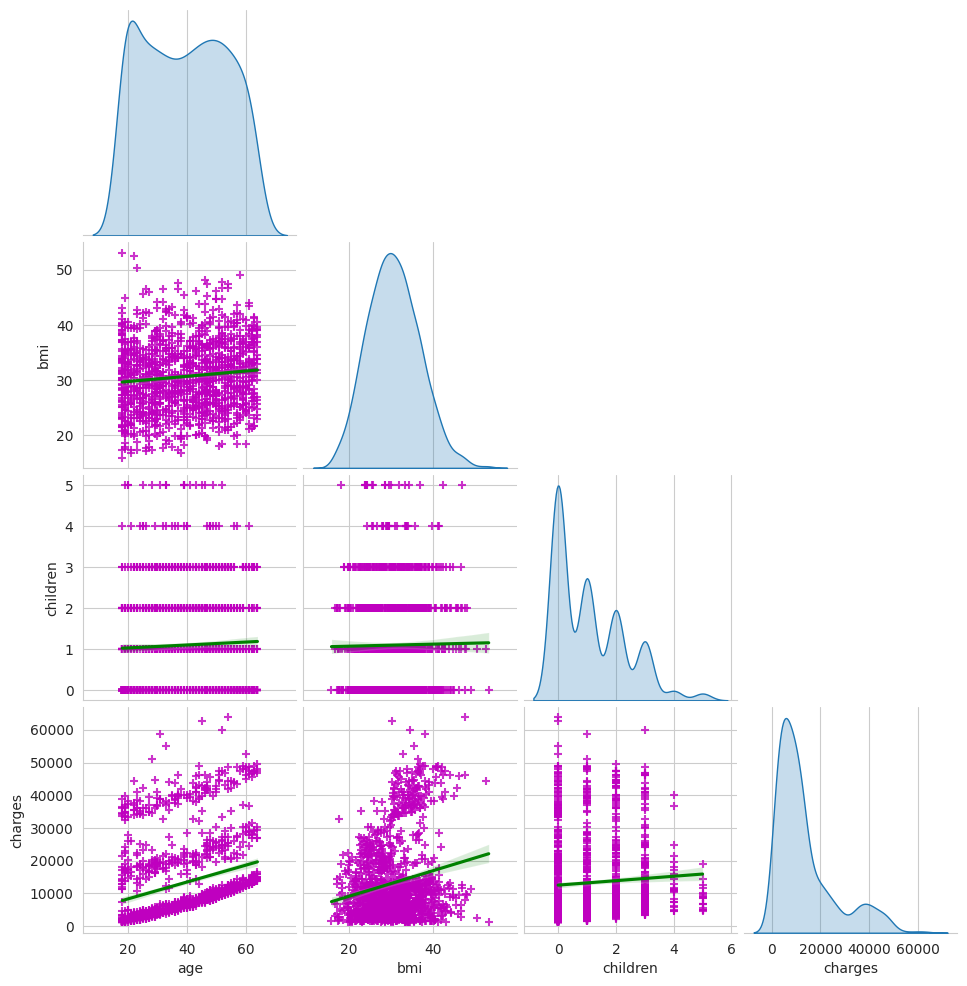

In [80]:
sns.pairplot(df, diag_kind = "kde", kind = "reg", markers = "+",
             plot_kws = {"line_kws" : {"color" : "g"}, "scatter_kws" : {"color" : "m"}},
             corner = True)
#선을 +로 바꾸고 line keywords를 green으로, scatter 선도 magenta color로. corner = True 해서 축이 겹치는거 없앰

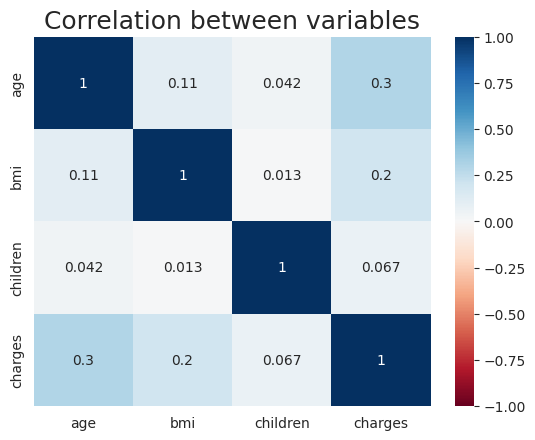

In [87]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "RdBu",
            vmax = 1, vmin = -1) #수치형 데이터만, annotation달기, 색상 RdBu, 범위
plt.title("Correlation between variables", size = 18)
plt.show()